# kiểm tra phân phối nhãn : check distribution of labels

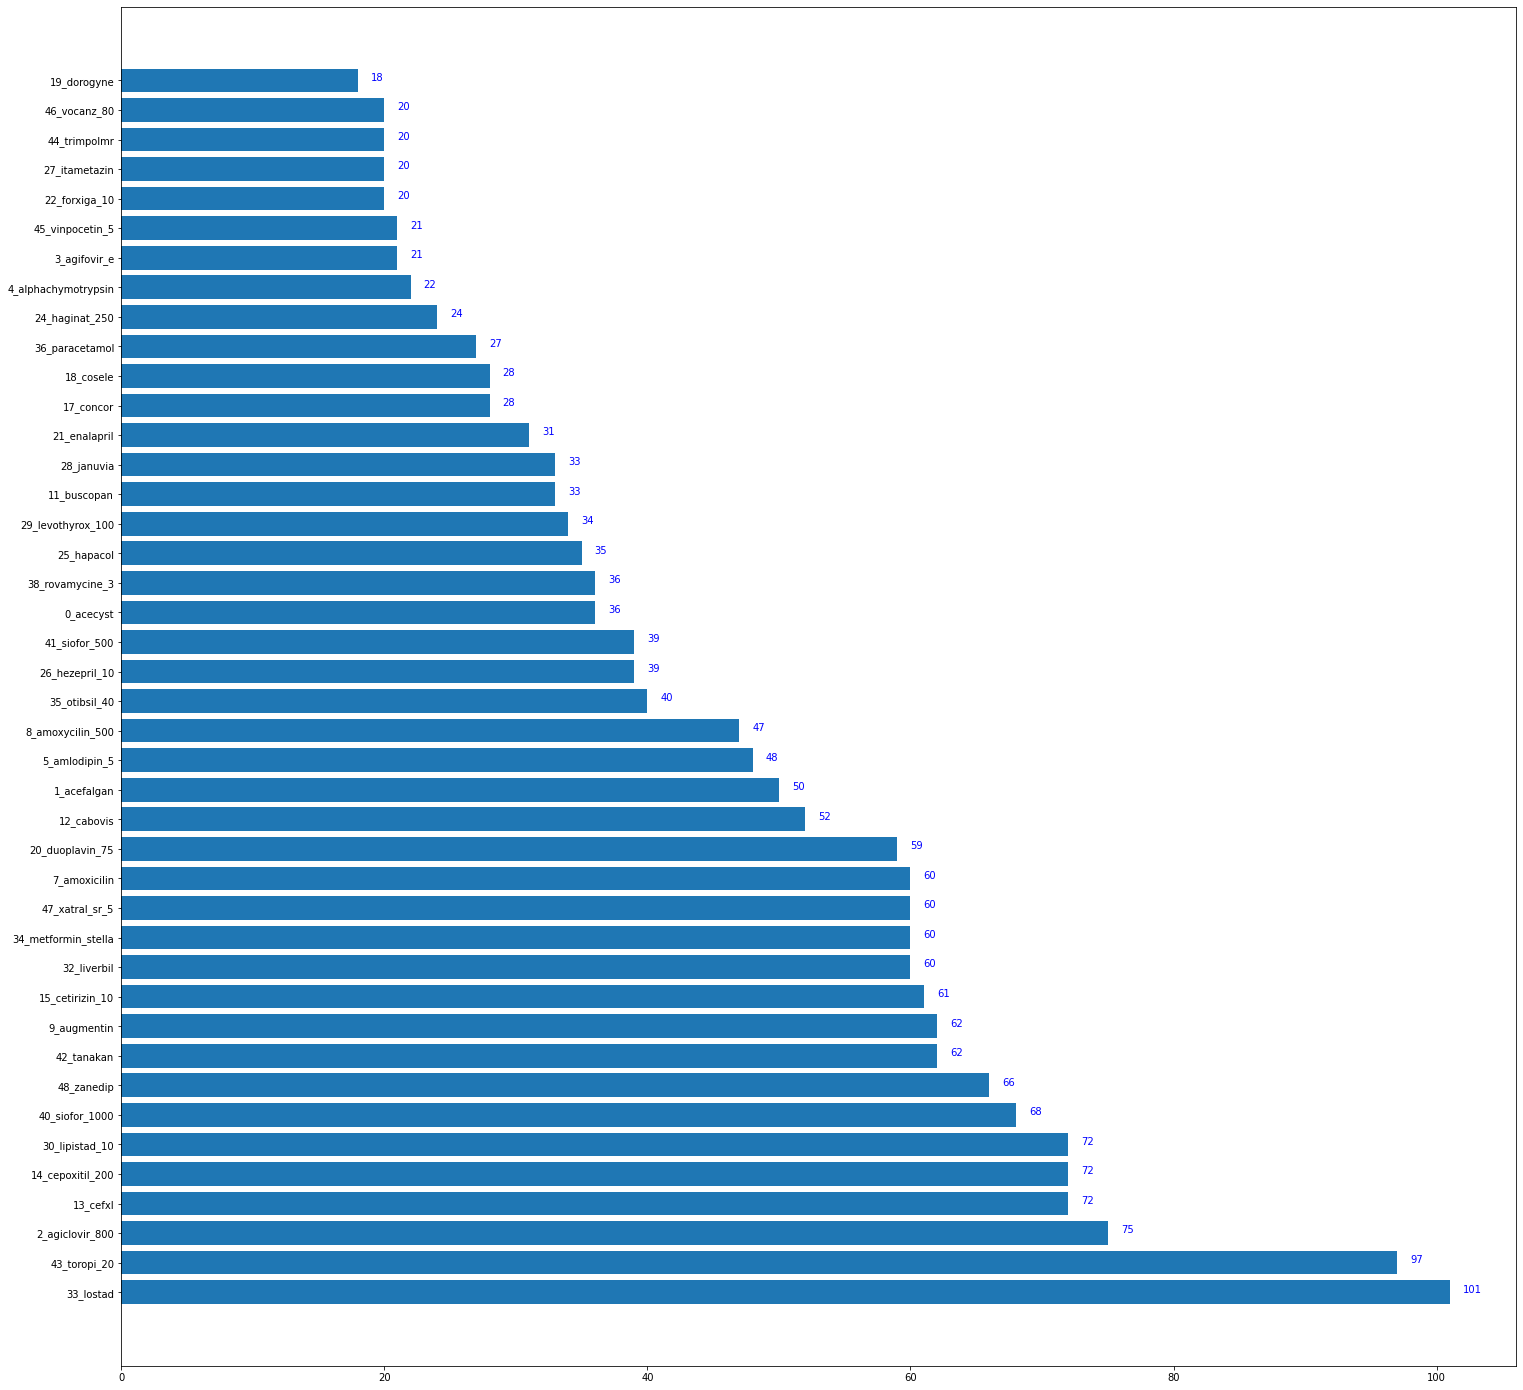

In [6]:
import os
root = "DATA_sorted\\v0_v10_raw\\images"
folder_name_list = os.listdir(root)
distribution_list = []
for folder_name in folder_name_list:
    folder_path = os.path.join(root, folder_name)
    file_name_list = os.listdir(folder_path)
    distribution_list.append((folder_name, len(file_name_list)))

dis_sorted = sorted(distribution_list, key=lambda x: x[1], reverse=True)
names = [x[0] for x in dis_sorted]
values  = [x[1] for x in dis_sorted]
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))


plt.barh(names, values)
for i, v in enumerate(values):
    plt.text(v + 1, i, str(v), color='blue')
plt.show()
   

# Chia dữ liệu theo tỷ lệ 0.6 0.2 0.2

In [42]:
root_source = "DATA_sorted\\v0_v10_raw"
root_target = "DATA_sorted\\v0_v10_3folders"

folder_type_dict  = {"train":0.6, "valid":0.5, "test":1} # 0.5*0,4 = 0.2


folder_type = "test"
division_ratio = folder_type_dict[folder_type]

In [43]:
import random
import shutil
target_folder_type_path = os.path.join(root_target, folder_type)
if not os.path.exists(target_folder_type_path):
    os.mkdir(target_folder_type_path)
target_folder_type_image_name_path = "{}/images".format(target_folder_type_path)
target_folder_type_label_name_path = "{}/labels".format(target_folder_type_path)
if not os.path.exists(target_folder_type_image_name_path):
    os.mkdir(target_folder_type_image_name_path)
    os.mkdir(target_folder_type_label_name_path)



# print("folder_type_path: {}".format(folder_type_path))
# print("folder_type_image_name_path: {}".format(folder_type_image_name_path))
# print("folder_type_label_name_path: {}".format(folder_type_label_name_path))

folder_image_name_list = os.listdir("{}/images".format(root_source))

for folder_image_name in folder_image_name_list:
    folder_image_path = os.path.join("{}/images".format(root_source), folder_image_name)
    image_name_list = os.listdir(folder_image_path)
    sample_image_list = random.sample(image_name_list, round(len(image_name_list) * division_ratio))
    
    folder_type_image_path = "{}/{}".format(target_folder_type_path, folder_image_name)

    

    for sample_image_name in sample_image_list:
        source_image_path = "{}/images/{}/{}".format(root_source, folder_image_name, sample_image_name)
        source_label_path = "{}/labels/{}/{}".format(root_source, folder_image_name, sample_image_name.replace(".jpg", ".txt"))
        
        target_folder_image_path = "{}/images/{}".format(target_folder_type_path, folder_image_name)
        target_folder_label_path = "{}/labels/{}".format(target_folder_type_path, folder_image_name)
        
        
        
        if not os.path.exists(target_folder_image_path):
            os.mkdir(target_folder_image_path)
            os.mkdir(target_folder_label_path)

        target_image_path = "{}/images/{}/{}".format(target_folder_type_path, folder_image_name, sample_image_name)
        target_label_path = "{}/labels/{}/{}".format(target_folder_type_path, folder_image_name, sample_image_name.replace(".jpg", ".txt"))


        print("source_image_path: {}".format(source_image_path))
        print("source_label_path: {}".format(source_label_path))
        print("target_folder_image_path: {}".format(target_folder_image_path))
        print("target_folder_label_path: {}".format(target_folder_label_path))
        
        print("target_image_path: {}".format(target_image_path))
        print("target_label_path: {}".format(target_label_path))

        shutil.move(source_image_path, target_image_path)
        shutil.move(source_label_path, target_label_path)





    

source_image_path: DATA_sorted\v0_v10_raw/images/0_acecyst/0_acecyst__(3).jpg
source_label_path: DATA_sorted\v0_v10_raw/labels/0_acecyst/0_acecyst__(3).txt
target_folder_image_path: DATA_sorted\v0_v10_3folders\test/images/0_acecyst
target_folder_label_path: DATA_sorted\v0_v10_3folders\test/labels/0_acecyst
target_image_path: DATA_sorted\v0_v10_3folders\test/images/0_acecyst/0_acecyst__(3).jpg
target_label_path: DATA_sorted\v0_v10_3folders\test/labels/0_acecyst/0_acecyst__(3).txt
source_image_path: DATA_sorted\v0_v10_raw/images/0_acecyst/0_acecyst__(8).jpg
source_label_path: DATA_sorted\v0_v10_raw/labels/0_acecyst/0_acecyst__(8).txt
target_folder_image_path: DATA_sorted\v0_v10_3folders\test/images/0_acecyst
target_folder_label_path: DATA_sorted\v0_v10_3folders\test/labels/0_acecyst
target_image_path: DATA_sorted\v0_v10_3folders\test/images/0_acecyst/0_acecyst__(8).jpg
target_label_path: DATA_sorted\v0_v10_3folders\test/labels/0_acecyst/0_acecyst__(8).txt
source_image_path: DATA_sorted\v